In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from IPython.core.display import display, HTML
from sklearn import preprocessing
from sklearn import metrics
import a3
import warnings

warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1 Introduction
ssssssssssssssssssss
ddddddddddd

## 2 Supervised Learning : Democratic Level Classifier

#### 2.1 Load and scale
 * Load data
 * With Min-Max scalling, all values will be scaled to values between **0-1**

In [33]:
happiness = a3.create_df_and_scale_for_task2()
happiness.head()

,year,happiness,gdp_pc,support,life_expected,choice,generosity,corruption,positive,negative,gov_confidence,democratic,delivery,sd_country_year,sd_m_country_year,gini,unemployment,pop,tax,gdp_g
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.570025,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.565744,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.601575,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.668341,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.651068,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143


#### 2.2 Create categorical feature as the target

In [3]:
democracy = a3.create_categorical_feature_as_target(df=happiness)
democracy.head()

,year,happiness,gdp_pc,support,life_expected,choice,generosity,corruption,positive,negative,gov_confidence,delivery,sd_country_year,sd_m_country_year,gini,unemployment,pop,tax,gdp_g,democratic level
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384,b
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624,b
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001,b
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976,b
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143,b


#### 2.3 Feature exploration
* Plot histogram for each feature to check its ability for classification
* Choose features that are good at classification

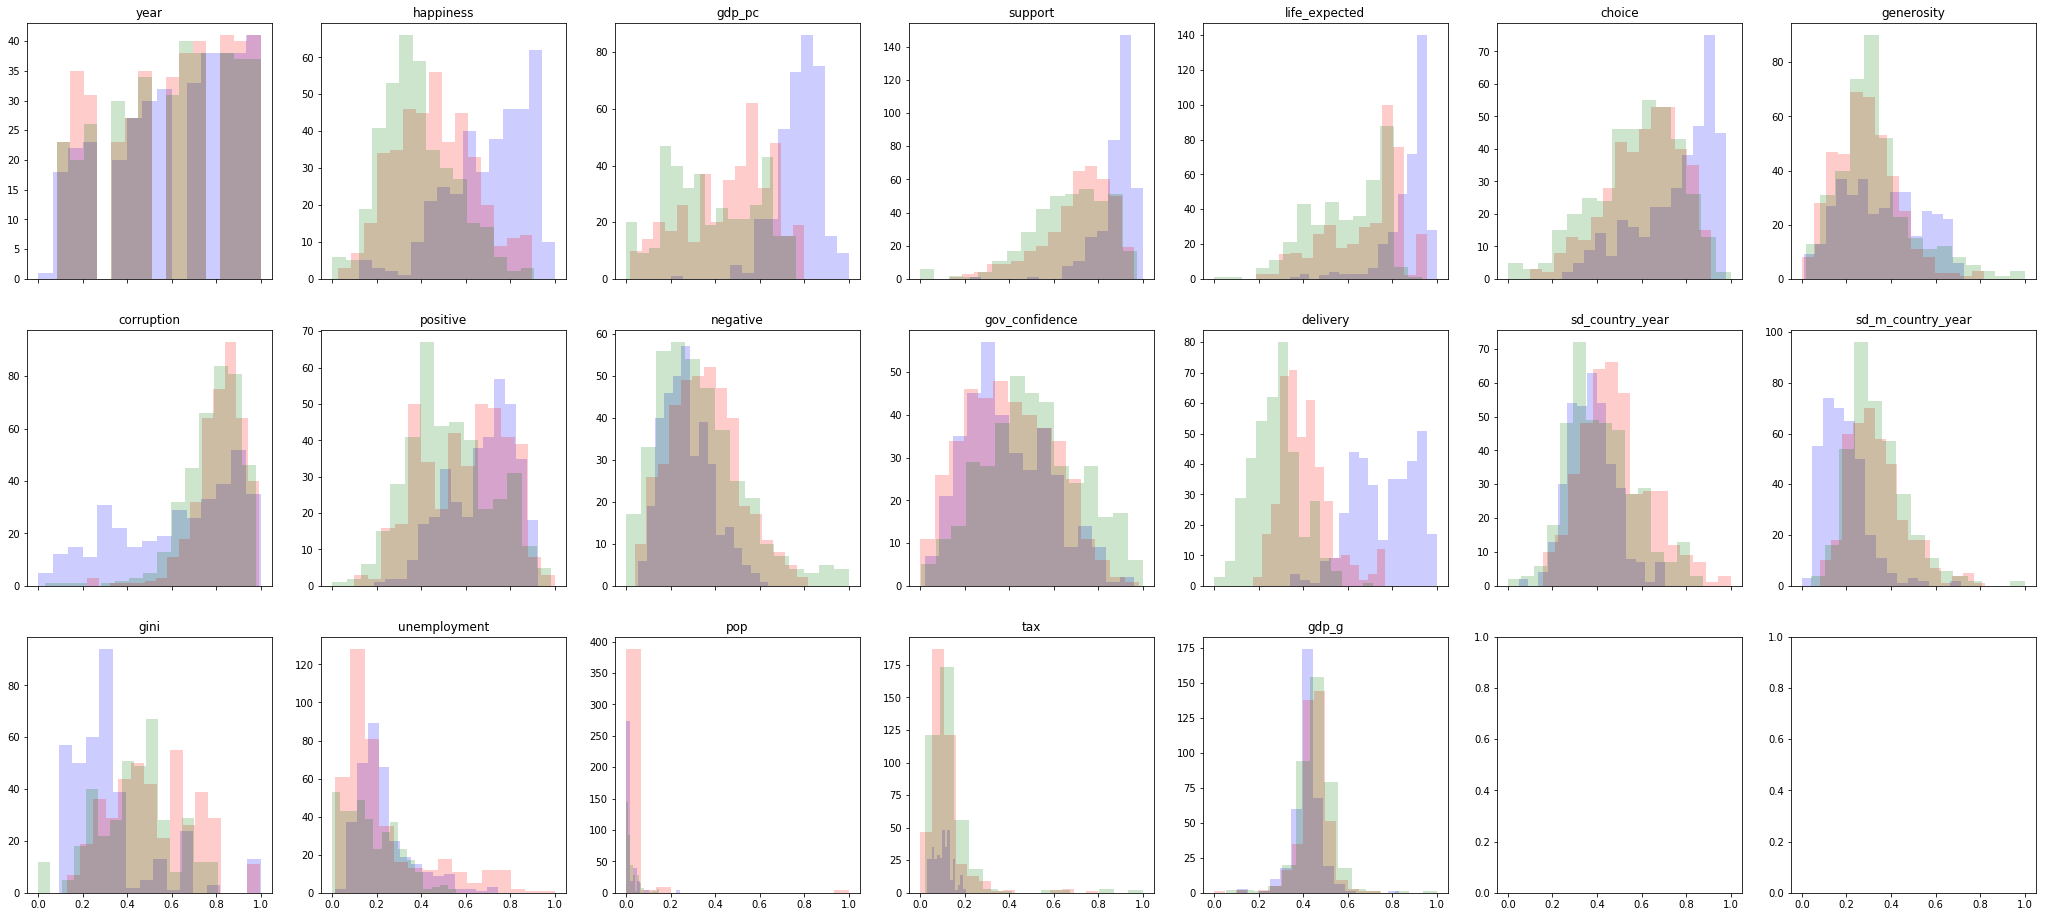

In [4]:
a3.plot_hists_for_features(democracy)

* As can be see above the following features are better for discriminating features.

In [6]:
features = [
    'happiness', 
    'gdp_pc', 
    'support',
    'choice',
    'delivery', 
    'gini'
]
democracy[features].head()

,happiness,gdp_pc,support,choice,delivery,gini
0,0.367801,0.523649,0.764567,0.370338,0.372007,0.222289
1,0.533754,0.557490,0.711498,0.470885,0.393986,0.222289
2,0.351960,0.559846,0.675478,0.512697,0.393481,0.222289
3,0.401813,0.563775,0.482763,0.654494,0.428090,0.222289
4,0.362571,0.568742,0.502582,0.612021,0.436496,0.222289


#### 2.4 Feature selection
 * Using **SelectKBest** to choose the best combination for each length of combinations

In [7]:
y = democracy['democratic level']
selectors = [SelectKBest(chi2, i) for i in range(1,7)]
x_with_k_best_features = [s.fit_transform(democracy[features], y) for s in selectors]
features_chosen = [list(zip(s.get_support(), features)) for s in selectors]

features_chosen

[[(False, 'happiness'),
  (False, 'gdp_pc'),
  (False, 'support'),
  (False, 'choice'),
  (True, 'delivery'),
  (False, 'gini')],
 [(False, 'happiness'),
  (True, 'gdp_pc'),
  (False, 'support'),
  (False, 'choice'),
  (True, 'delivery'),
  (False, 'gini')],
 [(True, 'happiness'),
  (True, 'gdp_pc'),
  (False, 'support'),
  (False, 'choice'),
  (True, 'delivery'),
  (False, 'gini')],
 [(True, 'happiness'),
  (True, 'gdp_pc'),
  (False, 'support'),
  (False, 'choice'),
  (True, 'delivery'),
  (True, 'gini')],
 [(True, 'happiness'),
  (True, 'gdp_pc'),
  (True, 'support'),
  (False, 'choice'),
  (True, 'delivery'),
  (True, 'gini')],
 [(True, 'happiness'),
  (True, 'gdp_pc'),
  (True, 'support'),
  (True, 'choice'),
  (True, 'delivery'),
  (True, 'gini')]]

#### 2.5 Model : Decision Tree
 * Fit models with different feature combinations and different parameters
 * Plot the line of accuracy for all combinations vs different max depth
 * Choose the best max depth

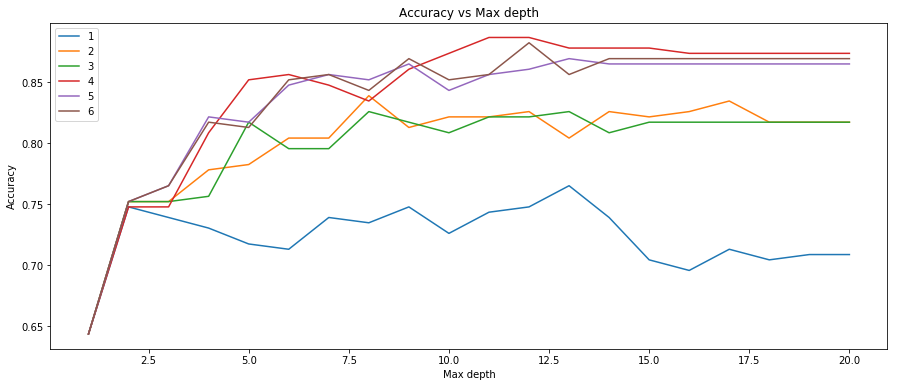

In [24]:
tree_matrix_df = pd.DataFrame(data={str(f):[0] * 20 for f in range(1,7)})

for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    for d in range(1, 21):
        tree = DecisionTreeClassifier(max_depth=d, random_state=1)
        score = tree.fit(x_train, y_train).score(x_test, y_test)
        tree_matrix_df.iloc[d-1, f-1] = score

tree_matrix_df.index += 1
_ = tree_matrix_df.plot(figsize=[15, 6], title='Accuracy vs Max depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

* The line for 4 features present best accuracy, with a peak value at depth=11. This value is chosen for cross model comparison
* Mutiple lines shows a bit overfit after depth=12


In [23]:
tree_matrix_df[tree_matrix_df.index==11]

,1,2,3,4,5,6
11,0.743478,0.821739,0.821739,0.886957,0.856522,0.856522


#### 2.6 Model : KNN
 * Fit models with different feature combinations and different parameters
 * Plot the line of accuracy for all combinations vs different parameters
 * Choose the best parameter

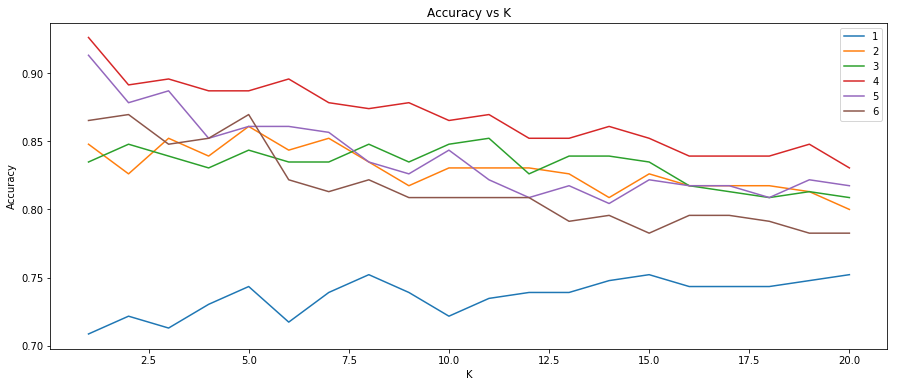

In [25]:
knn_matrix_df = pd.DataFrame(data={str(f):[0] * 20 for f in range(1,7)})

for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    for d in range(1, 21):
        tree =KNeighborsClassifier(n_neighbors=d, metric='euclidean')
        score = tree.fit(x_train, y_train).score(x_test, y_test)
        knn_matrix_df.iloc[d-1, f-1] = score

knn_matrix_df.index += 1

_ = knn_matrix_df.plot(figsize=[15, 6], title='Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()   

* The 4 features line present the best accuracy. 
* Most lines present the best accuracy at k=1 except the line for 1 feature.

In [25]:
knn_matrix_df[knn_matrix_df.index==1]

,1,2,3,4,5,6
1,0.708696,0.847826,0.834783,0.926087,0.913043,0.865217


#### 2.7 Model : Naive Bayes
 * No parameter to tune for Naive Bayes

In [27]:
nb = GaussianNB()

nb_score=[]
for f in range(1, 7):
    x = x_with_k_best_features[f-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    score = nb.fit(x_train, y_train).score(x_test, y_test)
    nb_score.append(score)
    
nb_score    

[0.7565217391304347,
 0.7304347826086957,
 0.7130434782608696,
 0.7565217391304347,
 0.7391304347826086,
 0.7434782608695653]

#### 2.8 Multiple model comparison

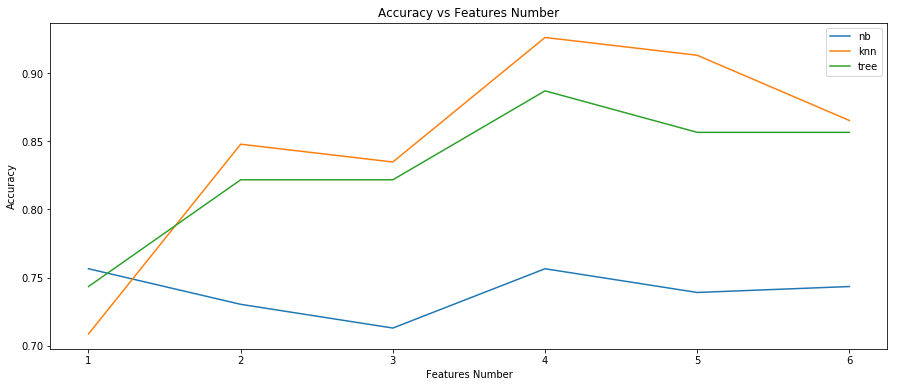

In [31]:
multiple_model_df = pd.DataFrame(data={'nb':nb_score, 
                                       'knn': knn_matrix_df[knn_matrix_df.index==1].values[0], 
                                       'tree': tree_matrix_df[tree_matrix_df.index==11].values[0]})
multiple_model_df.index += 1
multiple_model_df.plot(figsize=[15, 6], title='Accuracy vs Features Number')
plt.xlabel('Features Number')
plt.ylabel('Accuracy')

plt.show()

* All three algorithms present best accruracy at 4 features
* All three algorithms overfit when number of feature is greated than 4
* Generally, KNN present the best accuracy whereas Naive Bayes the worst.

## 3 Unsupervised Learning : Clustering

#### 3.1 Feature selection
 * Drop features hard to interpret, e.g. **sd_country_year**
 * Drop features that are strongly correlated, e.g. **democoratic** and **delivery**

In [2]:
to_drop = [
    'year', 
    'sd_m_country_year', 
    'sd_country_year', 
    'pop', 
    'support', 
    'choice', 
    'democoratic', 
    'delivery'
]
happiness = a3.data_frame_for_task3(columns_to_drop=to_drop) 
happiness.head()

,happiness,gdp_pc,life_expected,generosity,corruption,positive,negative,gov_confidence,gini,unemployment,tax,gdp_g
0,4.634252,9.077331,65.800003,-0.014393,0.874700,0.552678,0.246335,0.300681,0.30325,15.966,46.3,5.98
1,5.510124,9.246655,66.959999,-0.172262,0.847675,0.606636,0.271393,0.364894,0.30325,13.376,38.8,1.42
2,4.550648,9.258445,67.239998,-0.130645,0.862905,0.633609,0.338379,0.338095,0.30325,15.866,31.7,1.00
3,4.813763,9.278104,67.519997,-0.028162,0.882704,0.684911,0.334543,0.498786,0.30325,17.490,31.6,1.77
4,4.606651,9.302960,67.800003,-0.084411,0.884793,0.688370,0.350427,0.506978,0.30325,17.080,36.9,2.22


#### 3.2 Feature scaling
 * With Min-Max scalling, all values will be scaled to values between **0-1**

In [3]:
happiness = a3.scale(happiness)
happiness.head()

,happiness,gdp_pc,life_expected,generosity,corruption,positive,negative,gov_confidence,gini,unemployment,tax,gdp_g
0,0.367801,0.523649,0.786385,0.308105,0.872390,0.327263,0.288078,0.242555,0.222289,0.452554,0.117275,0.482384
1,0.533754,0.557490,0.813615,0.147836,0.840628,0.420115,0.338615,0.312747,0.222289,0.377807,0.094664,0.399624
2,0.351960,0.559846,0.820188,0.190086,0.858528,0.466530,0.473709,0.283453,0.222289,0.449668,0.073259,0.392001
3,0.401813,0.563775,0.826760,0.294128,0.881798,0.554810,0.465973,0.459107,0.222289,0.496537,0.072957,0.405976
4,0.362571,0.568742,0.833333,0.237023,0.884253,0.560763,0.498007,0.468062,0.222289,0.484704,0.088936,0.414143


#### 3.3 Multiple feature exploration
* Create a data frame that stores all combinations of 3 features
* Train KMeans for each combination and fill scores into the data frame
* Narrow down to combinations with high scores

In [4]:
all_combinations_df = a3.create_df_for_all_combinations(happiness, 3)        
all_combinations_df.head()

,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


In [5]:
a3.train_kmeans_and_fill_score(df=happiness, combinations_df=all_combinations_df)
all_combinations_df.head()

0/220
10/220
20/220
30/220
40/220
50/220
60/220
70/220
80/220
90/220
100/220
110/220
120/220
130/220
140/220
150/220
160/220
170/220
180/220
190/220
200/220
210/220


,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.450393
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.410894
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.431773
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.389089
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.355431


In [6]:
all_combinations_df_high_score = all_combinations_df[all_combinations_df.score > 0.4846]
all_combinations_df_high_score

,corruption,gdp_g,gdp_pc,generosity,gini,gov_confidence,happiness,life_expected,negative,positive,tax,unemployment,score
95,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.484777
135,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.544170
199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.498451
219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.552736


#### 3.4 Visualization
* Plot 3D firgure to visualize all combimnations with high score
* Evaluate model by calculating cohesion, seperation and ratio. Label such values on the figure
* Intrepret model and discuss

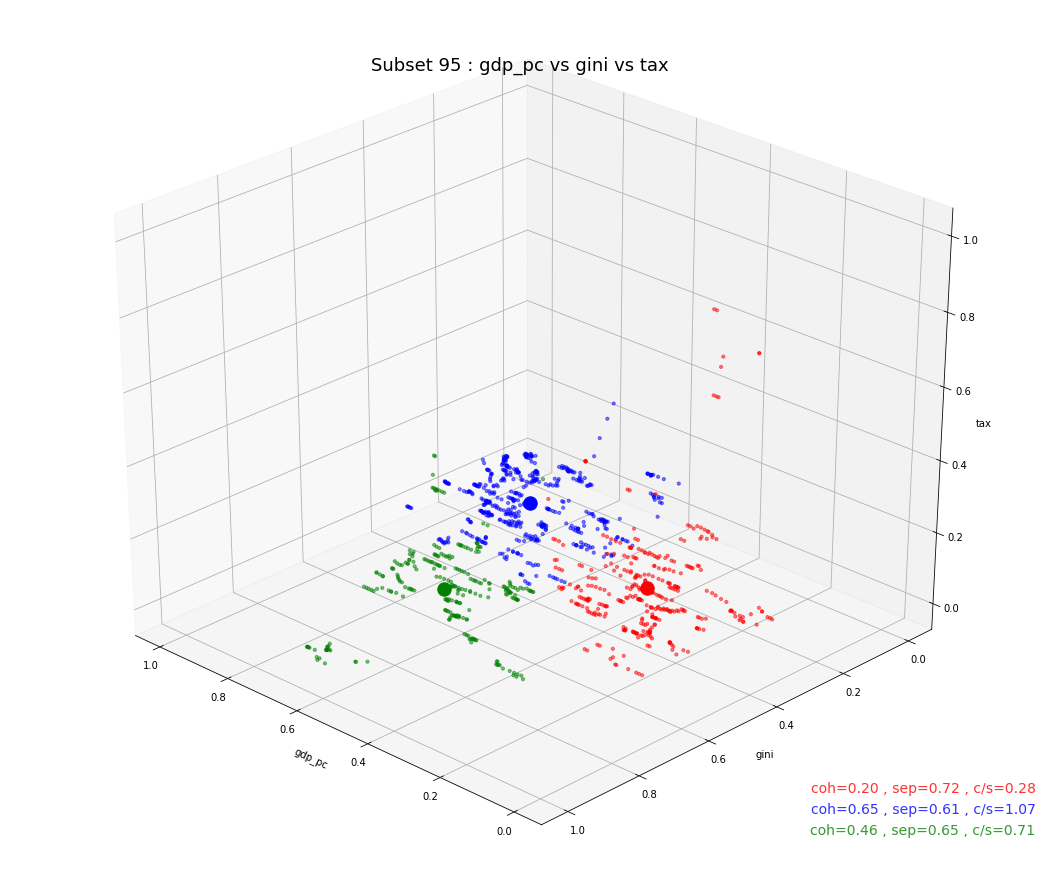

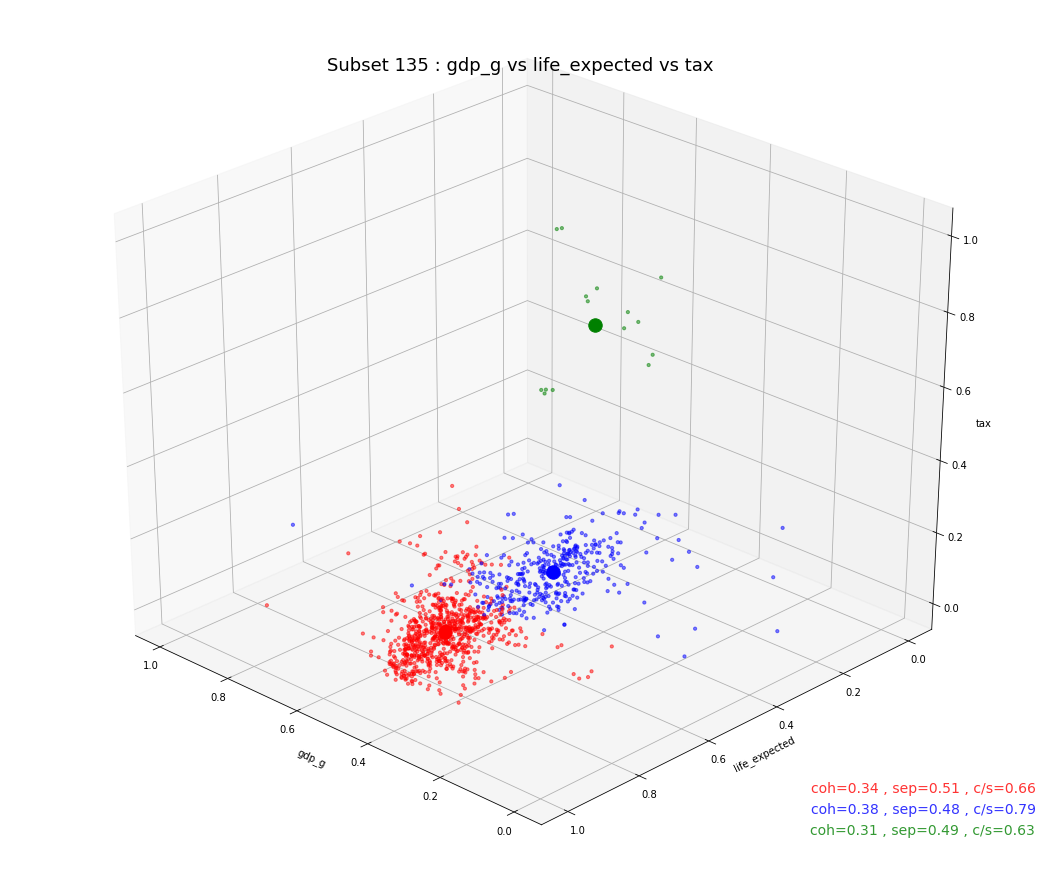

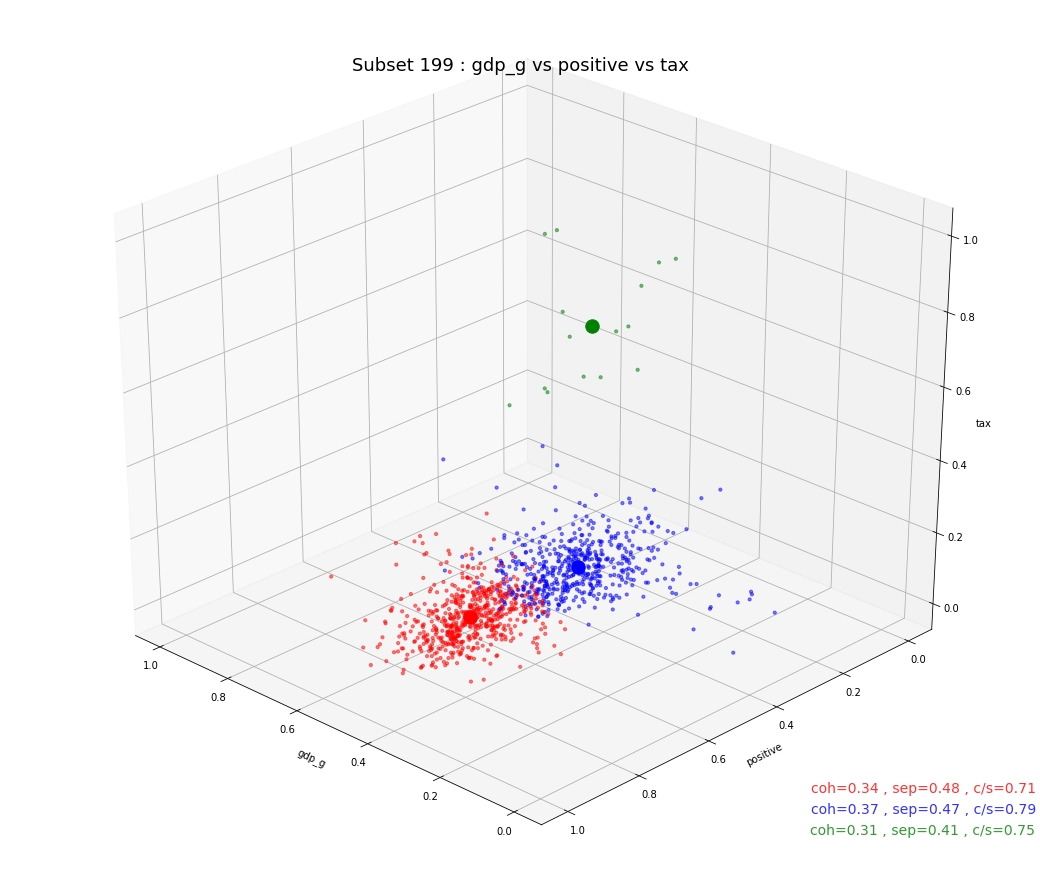

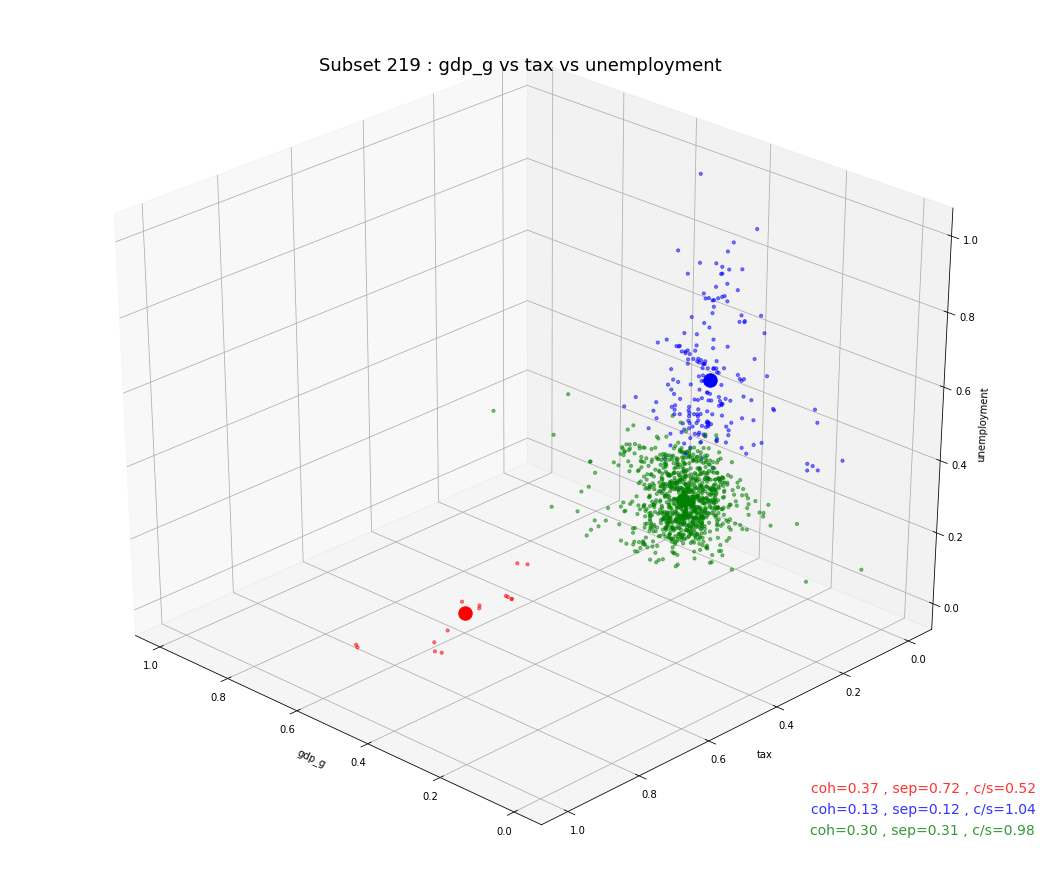

In [7]:
a3.plot_3d_clustering_for_combinations(df=happiness, combinations_df=all_combinations_df_high_score)

#### 3.5  Discuss and interpretation
 * **gdp_pc** vs **gini** vs **tax** : For this combination, gdp_pc and gini are important to define clusters. The 3 clusters as presetned are red: low gini and low gdp_pc, green: high gini and high gdp_pc, blue: low gini and high gdp_pc. With the coh/sep =1.07, the blue cluster present a quite clear cluster.
 * **gdp_g** vs **positive** vs **tax**: For this combination, positive and tax are important to define clusters. The 3 clusters as presetned are red: high positive and low tax, green: high tax and low positive, blue: low potive and low tax.
 * **gdp_g** vs **tax** vs **unemployment**: For this combination, unemployment and tax are important to define clusters. The 3 clusters as presetned are red: high tax and low umployment, green: low tax and low unemployment, blue: high unemployment and low tax.

## 4 Conclusion

???????????????????